In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data load

In [3]:
df =  pd.read_csv('dailyActivity_merged.csv')
df.sample(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
325,6290855005,4/2/2016,9548,7.22,7.22,0.000000,2.02,3.68,1.52,0.0,25,107,113,1195,3119
359,6962181067,4/6/2016,12480,8.86,8.25,3.972795,4.18,0.69,4.00,0.0,55,14,276,593,2170
427,8583815059,4/3/2016,2380,1.86,1.86,0.000000,0.00,0.00,1.86,0.0,0,0,131,1309,2400
11,1503960366,4/5/2016,14844,9.73,9.73,0.000000,2.94,0.76,6.04,0.0,36,18,341,736,2083
364,6962181067,4/11/2016,12362,9.09,8.17,2.696455,1.09,2.73,5.27,0.0,21,38,297,678,2188
223,4057192912,4/7/2016,4,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0,0,1,1439,1778
439,8792009665,4/7/2016,1291,0.83,0.83,0.000000,0.00,0.00,0.83,0.0,0,0,77,888,1961
94,2026352035,4/11/2016,3279,2.03,2.03,0.000000,0.00,0.00,2.03,0.0,0,0,164,694,1405
277,4702921684,3/30/2016,7583,6.15,6.15,0.000000,0.25,0.55,5.35,0.0,3,13,227,742,2915
184,4020332650,3/31/2016,7428,5.33,5.33,0.000000,0.87,0.92,3.51,0.0,18,33,261,860,3439


# Descriptive Analysis

In [4]:
df.isnull().sum() # tidak ada data null

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
df.duplicated().sum() # tidak ada baris duplicate

0

In [6]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


### Summary
Pada setiap kolom diduga terdapat outliers

# Visual Analysis

## Univariate Analysis

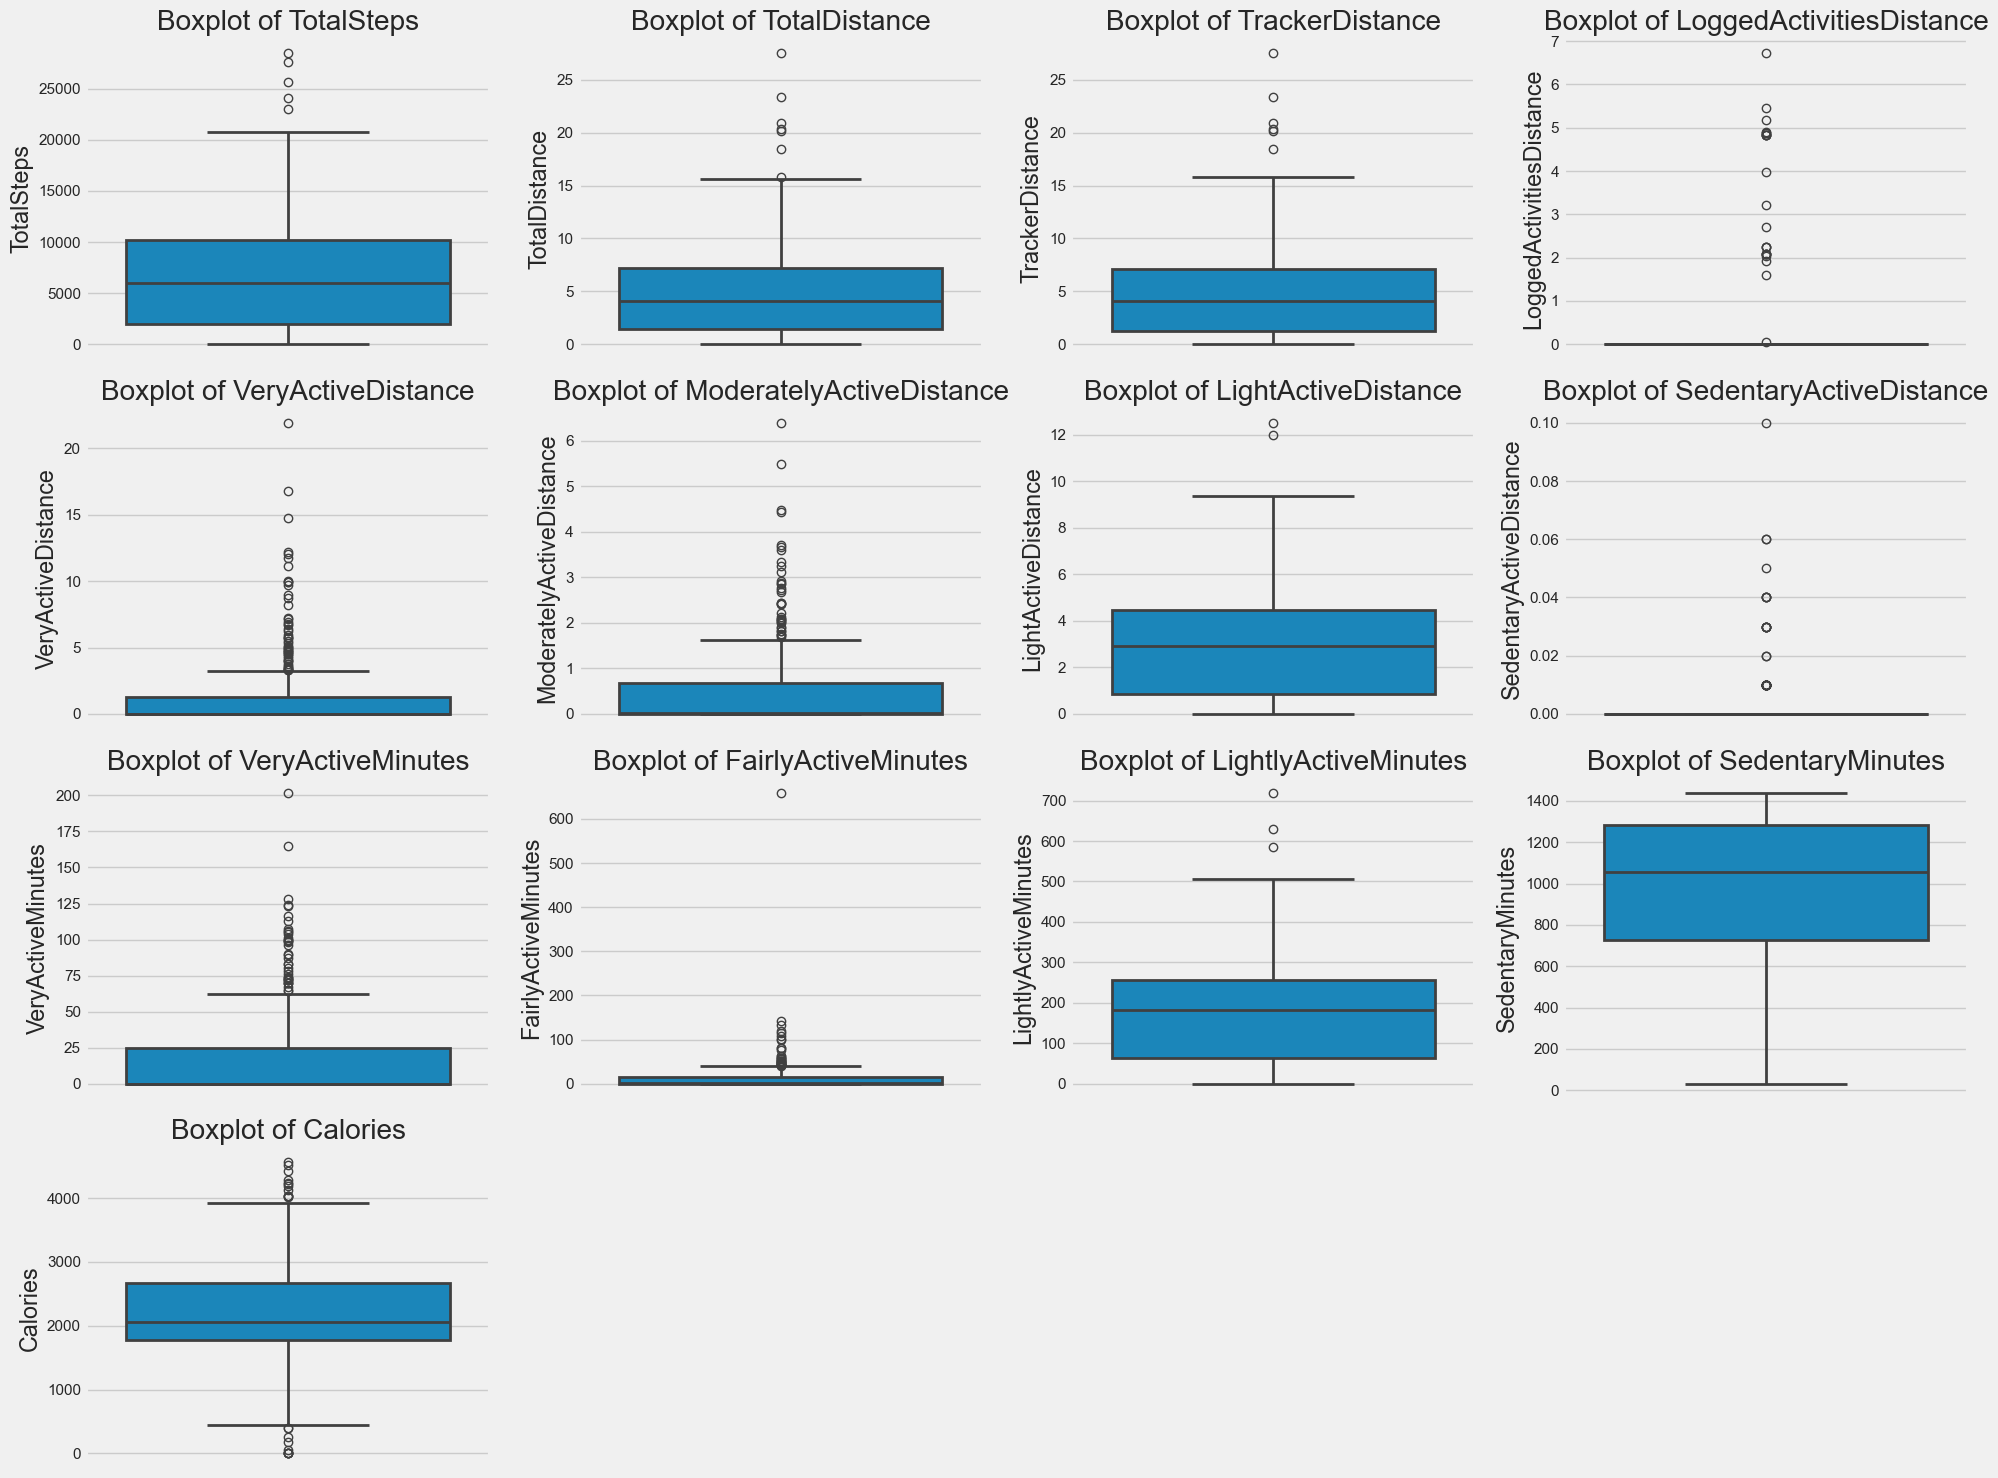

In [7]:
numerical = ['TotalSteps','TotalDistance','TrackerDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']
plt.figure(figsize=(20,15))
for i in range(0, len(numerical)):
    plt.subplot(4, math.ceil(len(numerical)/4), i+1)
    sns.boxplot(data=df, y=numerical[i], linewidth=2, orient='v')
    plt.title(f'Boxplot of {numerical[i]}')
plt.tight_layout()
plt.show()

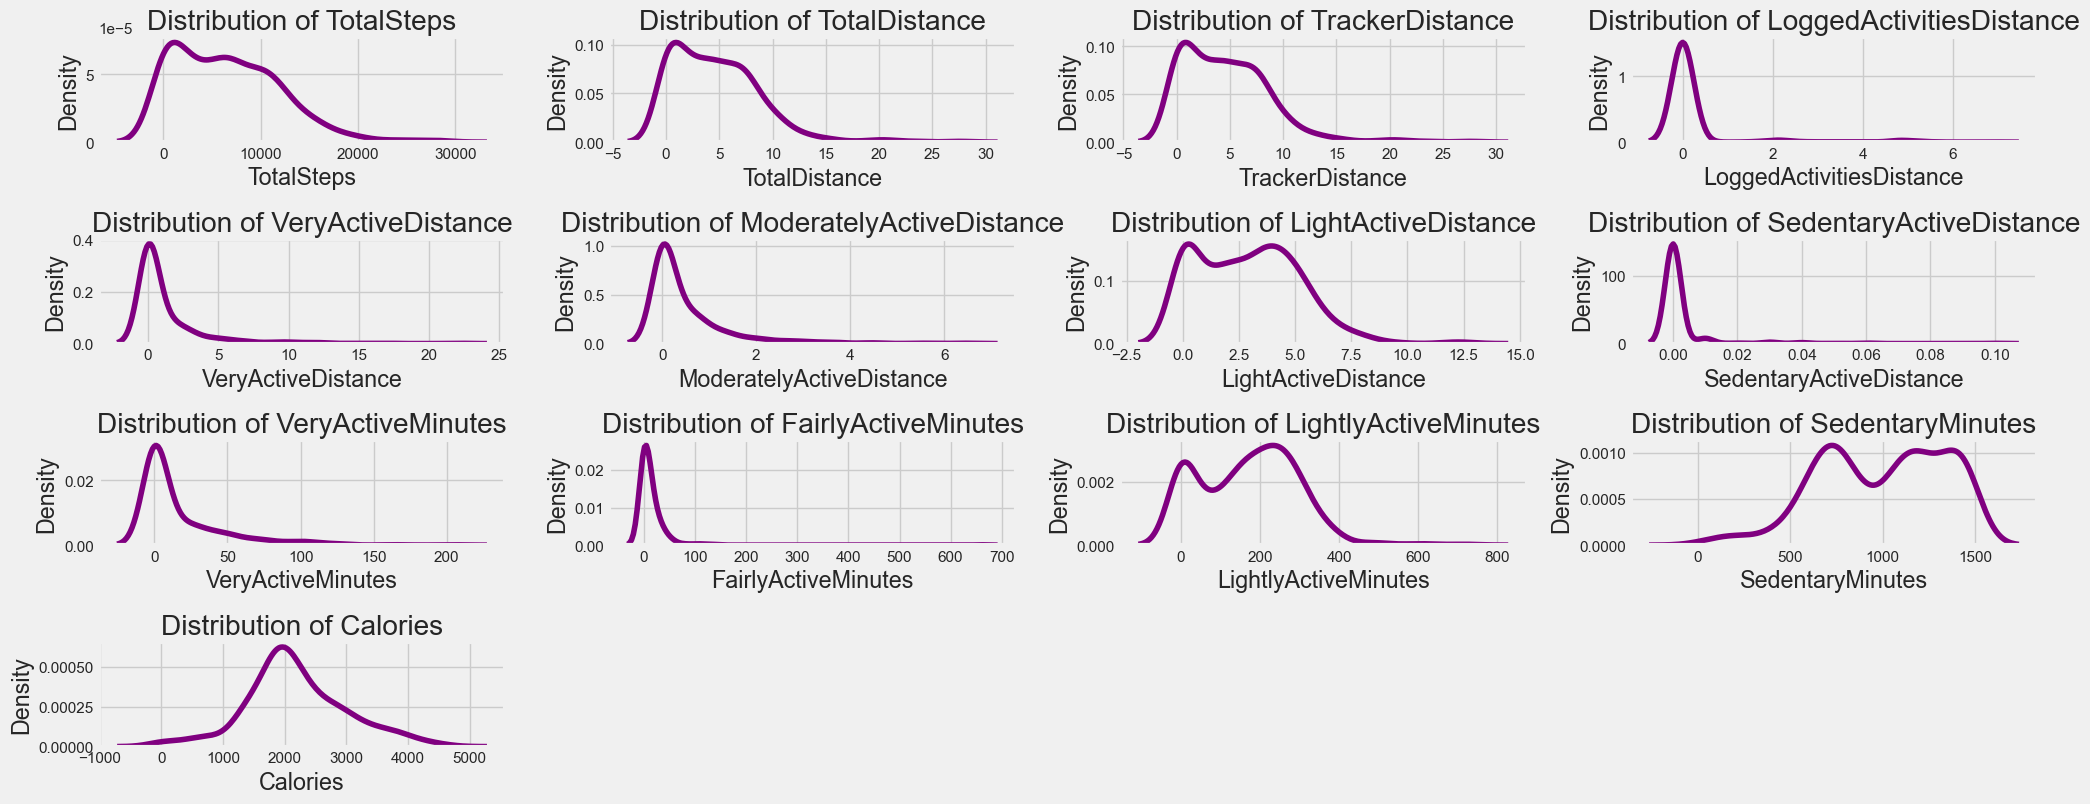

In [8]:
col = df[numerical].columns

for i in range(0,len(col)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=df[col[i]], color='purple')
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Calories Factor Correlation Heatmap')

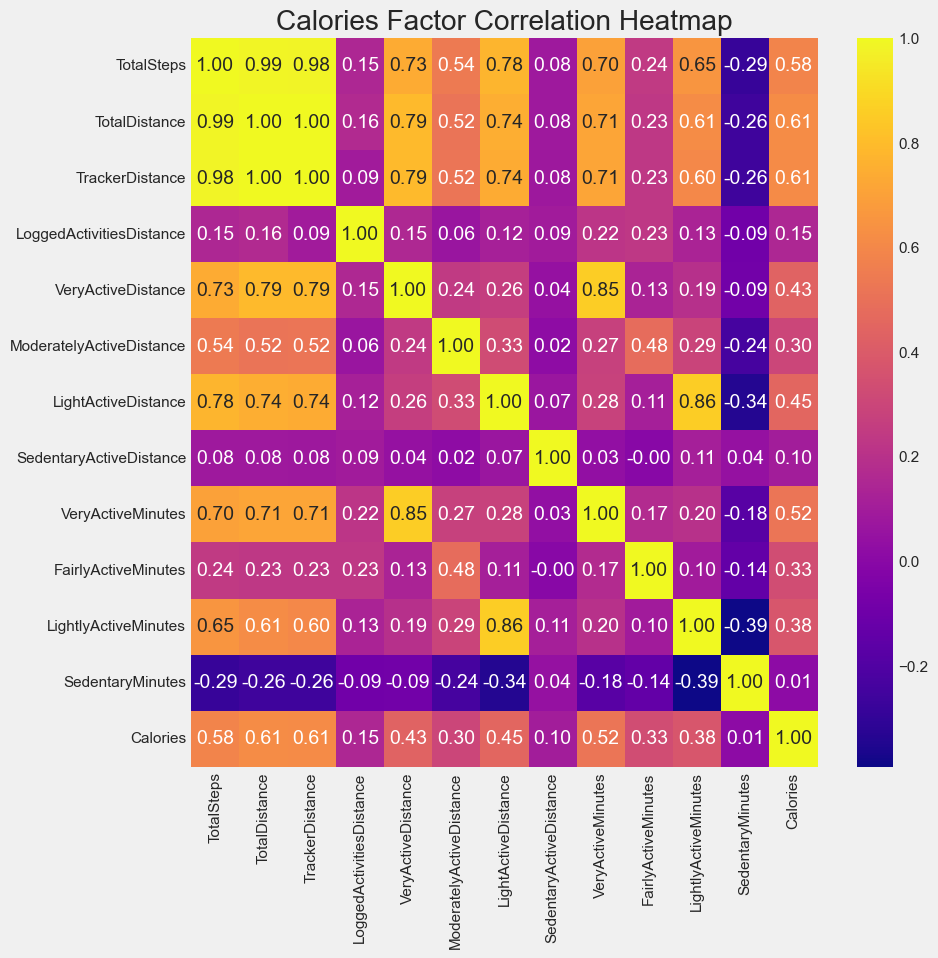

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(df[numerical].corr(), cmap='plasma', annot=True, fmt='.2f')
plt.title('Calories Factor Correlation Heatmap')

<Figure size 900x900 with 0 Axes>

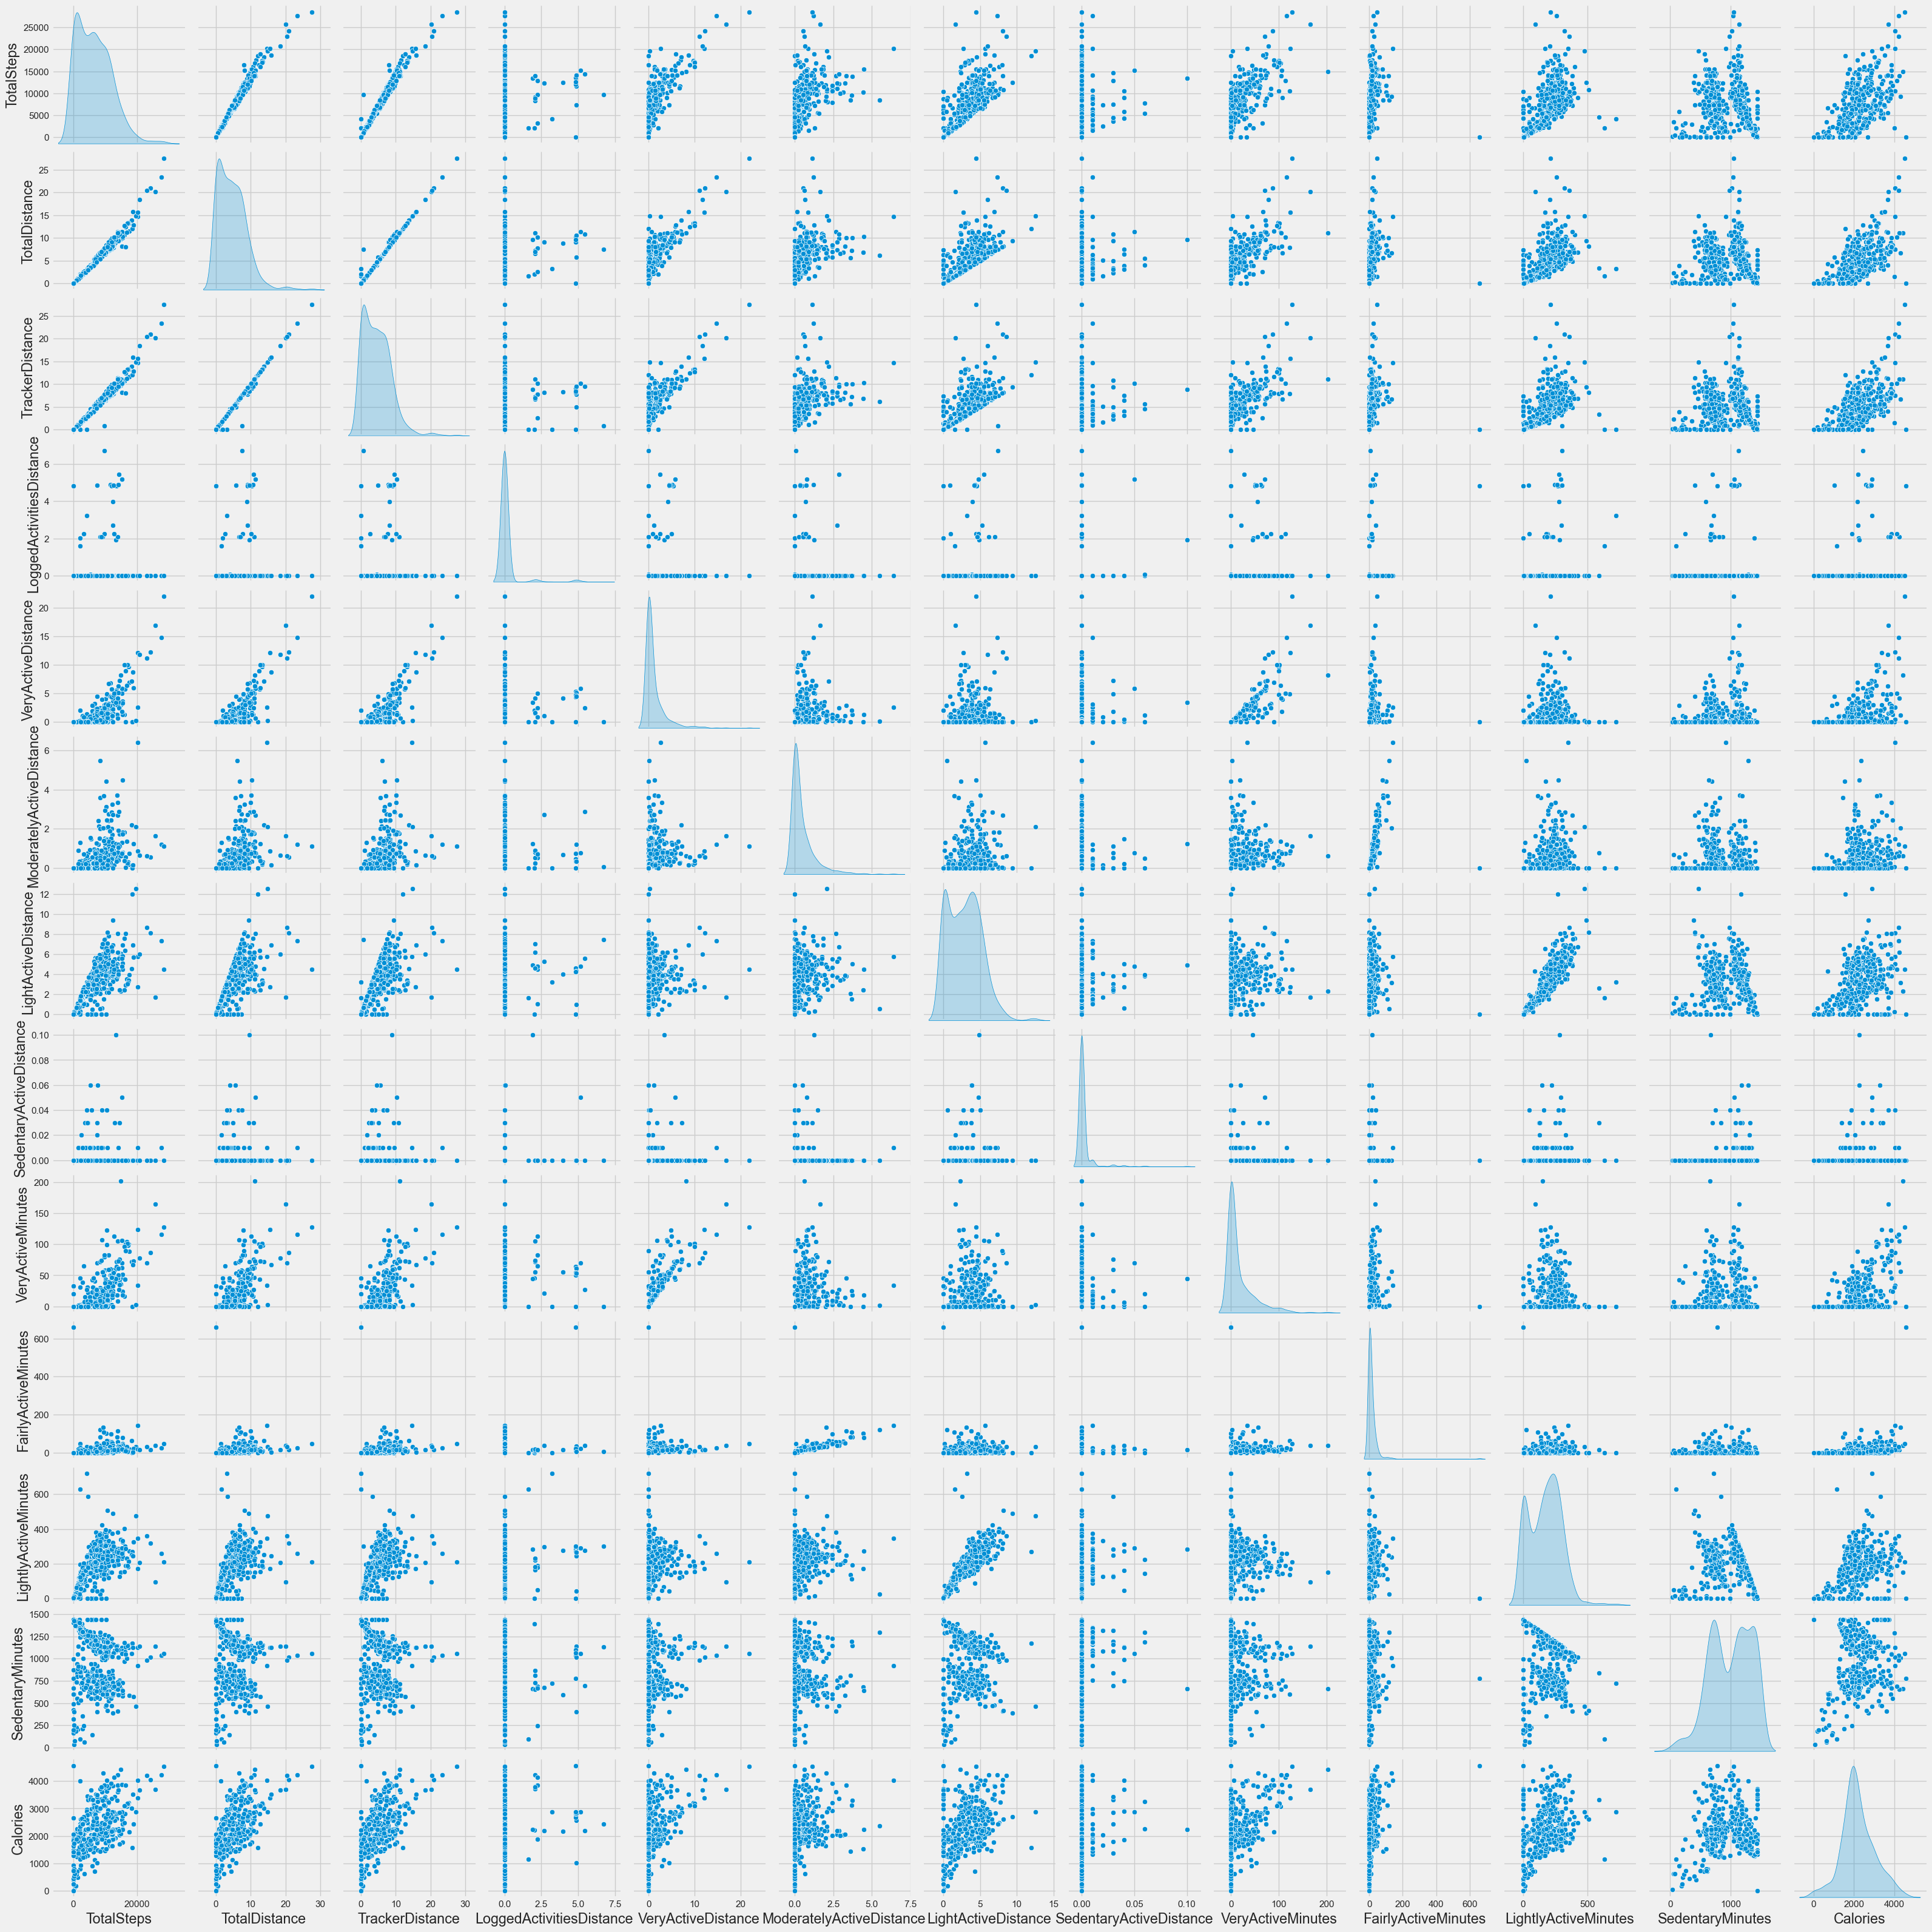

In [10]:
plt.figure(figsize=(9,9))
sns.pairplot(df[numerical], diag_kind='kde')
plt.show()

### Summary
- Terdapat outliers di semua kolom
- Nyaris semua kolom skew dan binomimal
- Calories sebarannya normal
- Nyaris semua kolom memiliki korelasi kuat terhadap Calories


# Data Preparation

In [18]:
# Normalisasi dengan square root

df2 = df.copy()
df2 = np.sqrt(df2[numerical])
df2.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,104.899952,2.666458,2.666458,0.0,1.603122,0.678233,2.017424,0.0,5.744563,3.464102,14.317821,28.354894,42.649736
1,132.698907,3.398529,3.398529,0.0,2.630589,0.854400,1.977372,0.0,9.433981,4.123106,16.552945,24.248711,46.411206
2,112.853888,2.920616,2.920616,0.0,2.158703,0.400000,1.926136,0.0,7.483315,2.236068,16.370706,24.596748,44.090815
3,115.026084,2.988311,2.988311,0.0,1.786057,0.888819,2.224860,0.0,6.244998,4.472136,14.966630,32.863353,43.954522
4,109.731490,2.801785,2.801785,0.0,1.469694,1.044031,2.147091,0.0,5.291503,5.291503,15.588457,27.622455,43.428102


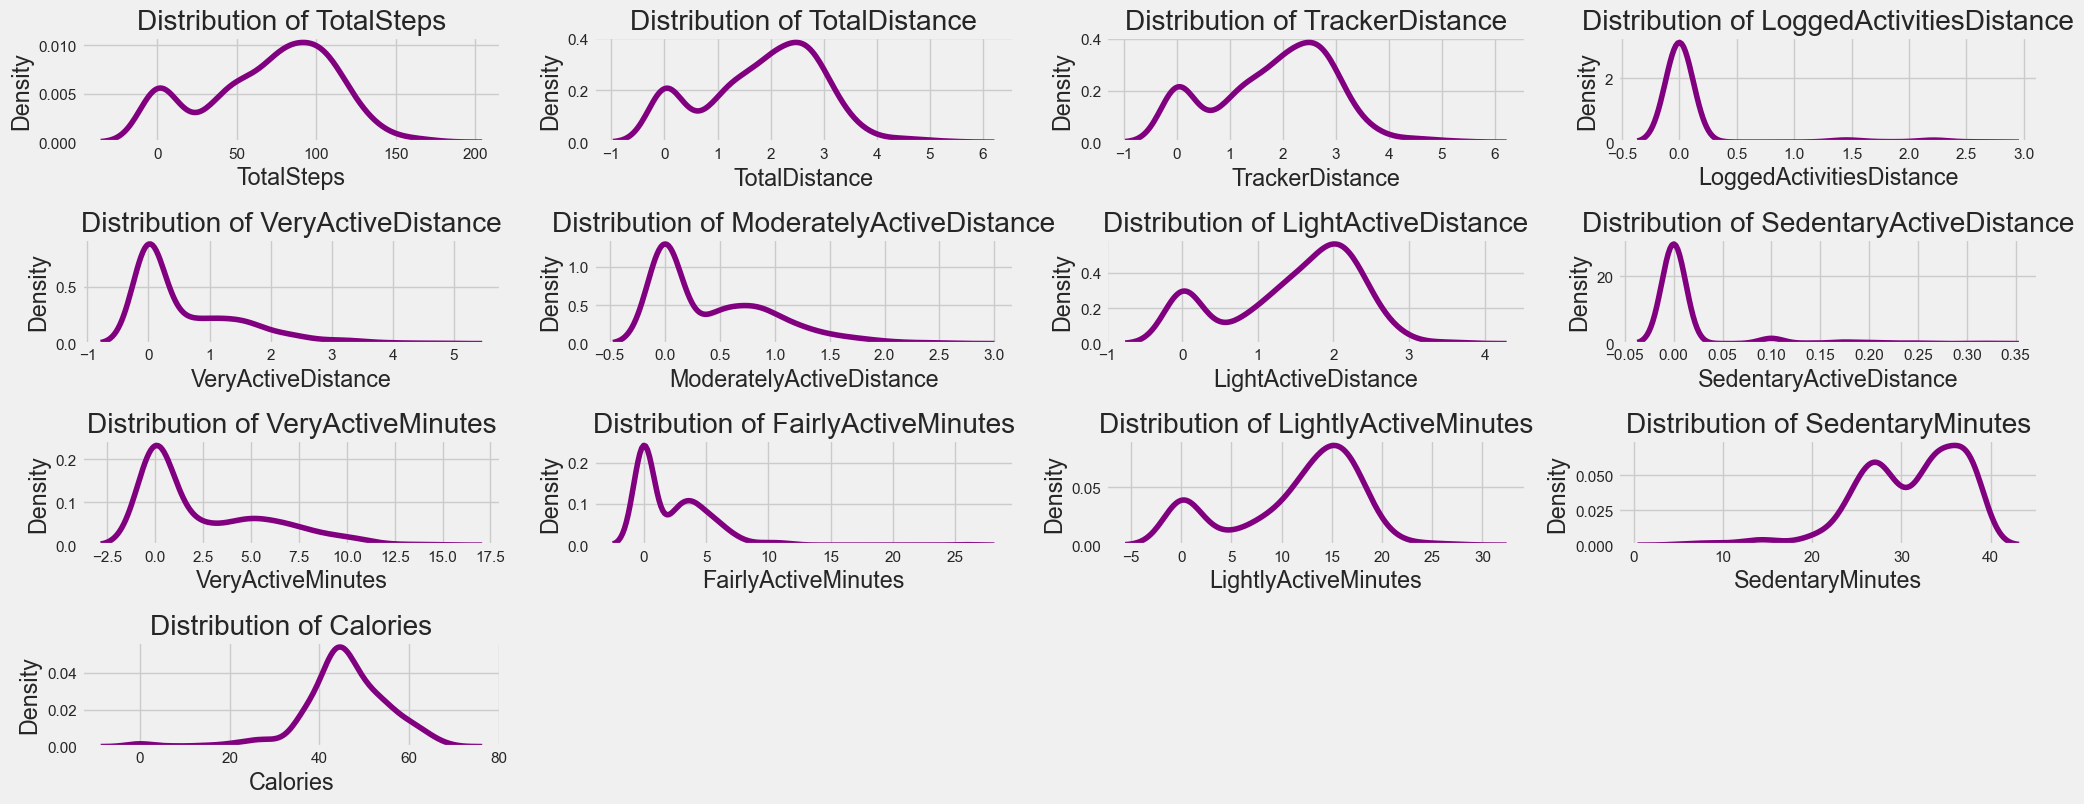

In [19]:
col = df2[numerical].columns

for i in range(0,len(col)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=df2[col[i]], color='purple')
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()

In [13]:
# Normalisasi dengan log transform
df1 = df.copy()
for num in numerical:
    min_positive = df1.loc[df1[num]>0,num].min()/2
    df1.loc[df1[num]>0,num] = np.log(df1[num] + min_positive)

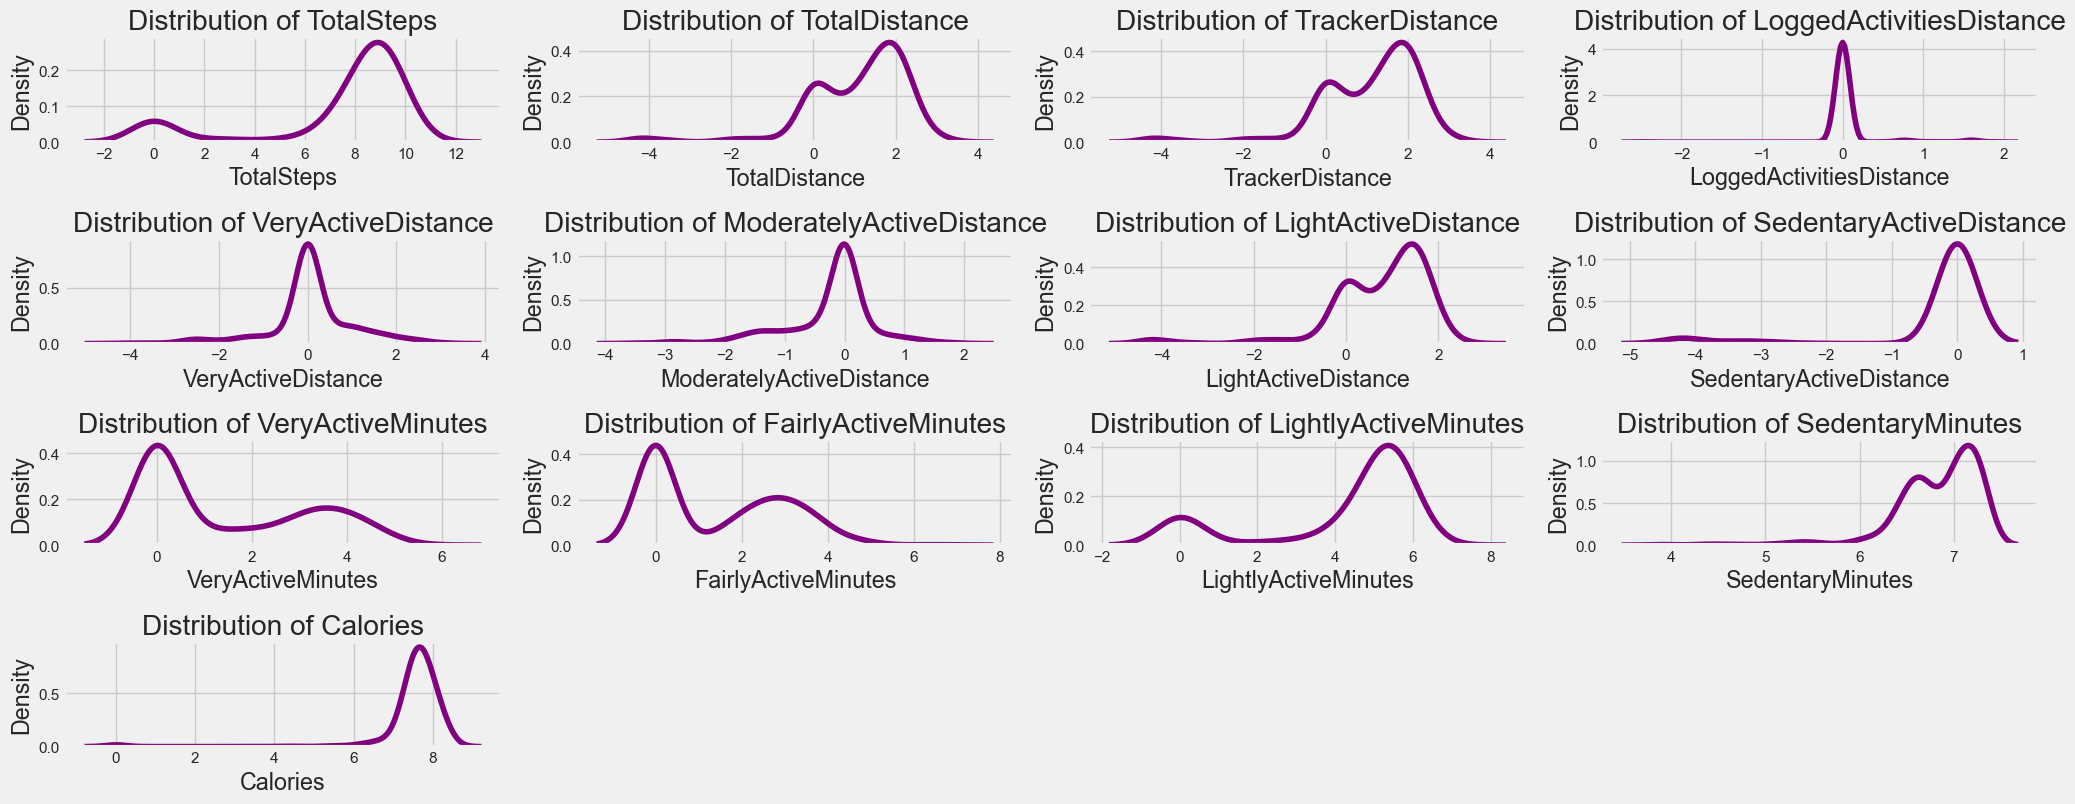

In [21]:
# Kdeplot setelah log transform
col = df1[numerical].columns

for i in range(0,len(col)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=df1[col[i]], color='purple')
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()

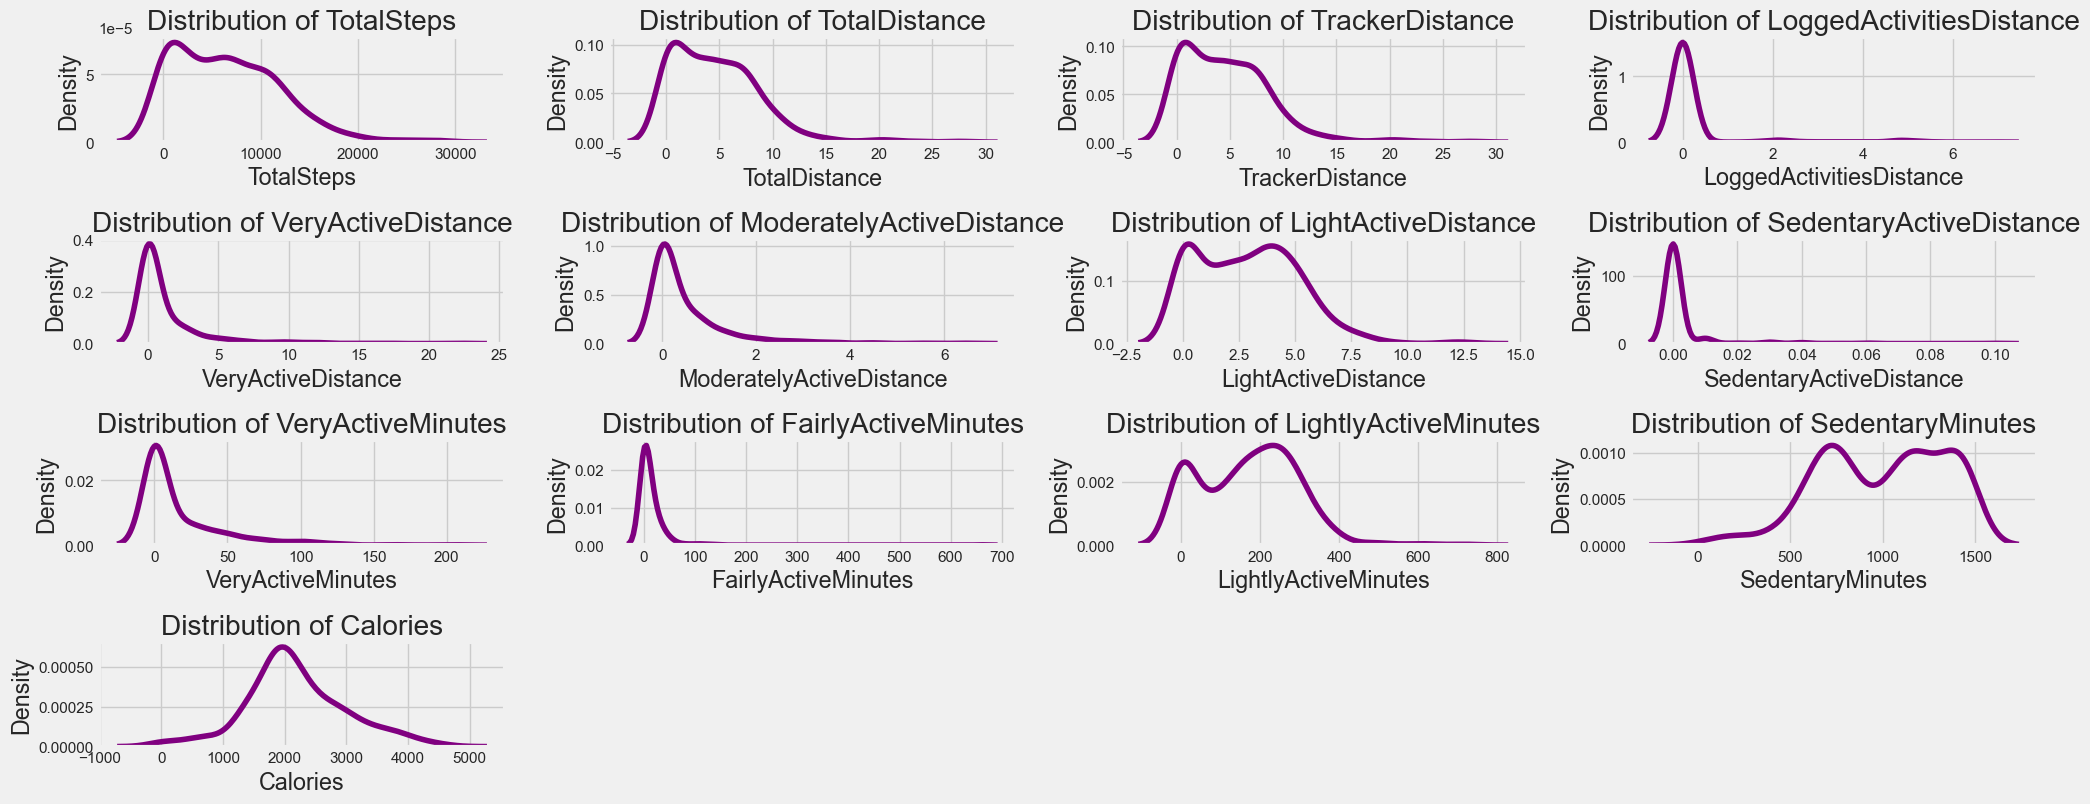

In [16]:
col = df[numerical].columns

for i in range(0,len(col)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=df[col[i]], color='purple')
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()